# Deceitful Correlation

#### How correlations alone can be misleading.

I will show how two random variables, which we know are independent of each other, can produce seemingly significant correlations.

## 1. Imports and Functions

These functions will be used to generate data for two orthogonal random variables of arbitrary length.

In [1]:
import numpy as np
import matplotlib.pyplot as plt  
import warnings

from scipy import stats
from scipy.signal import savgol_filter

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
def simulate_random_variables(rv_pairs, n_observations):
    '''This function samples two random variable vectors and
    computes their Pearson's correlation coefficient.
    
    Args:
        rv_pairs: The number of random variable pairs to simulate
        n_observations: The length of each random variable vector
    
    Returns:
        A list of all pearsonr tuples
        
    '''
    # Define list that will store all correlation tuples
    corr_matrix = []
    
    # Generate given number of random variable vector pairs
    # of n given length and calculate their Pearson's correlation
    # coefficients and p-values, then append that tuple to results
    for _ in range(rv_pairs):
        rv = [np.random.randn(1, n_observations)[0] for _ in range(2)]
        corr = stats.pearsonr(rv[0], rv[1])
        
        corr_matrix.append(corr)
    
    return corr_matrix

def max_correlation(x):
    '''Find the tuple with the maximum position 0 value.
    
    Args:
        x: A list of Pearson's correlation tuples
    
    Returns:
        The tuple with the maximum position 0 value
    '''
    first_values = [i[0] for i in x]
    m0 = np.max(first_values)
    
    idx = first_values.index(m0)
    
    return x[idx]

Here is a demo of what these functions do.

In [3]:
sim = simulate_random_variables(400, 16) 
max_correlation(sim)

(0.7738265313419024, 0.0004357098176058971)

## 2. Visualize Correlations

Let's see how these spurious correlations becomes less probable as the number of observations increases for our random variable vectors.

In [4]:
corrs, pvalues = [], []

n = 362
n_vector = [i for i in range(2, n)]

for obs in range(2,n):
    sim = simulate_random_variables(20, obs)
    highest_tuple = max_correlation(sim)
    
    
    corrs.append(highest_tuple[0])
    pvalues.append(highest_tuple[1])

<Figure size 720x504 with 0 Axes>

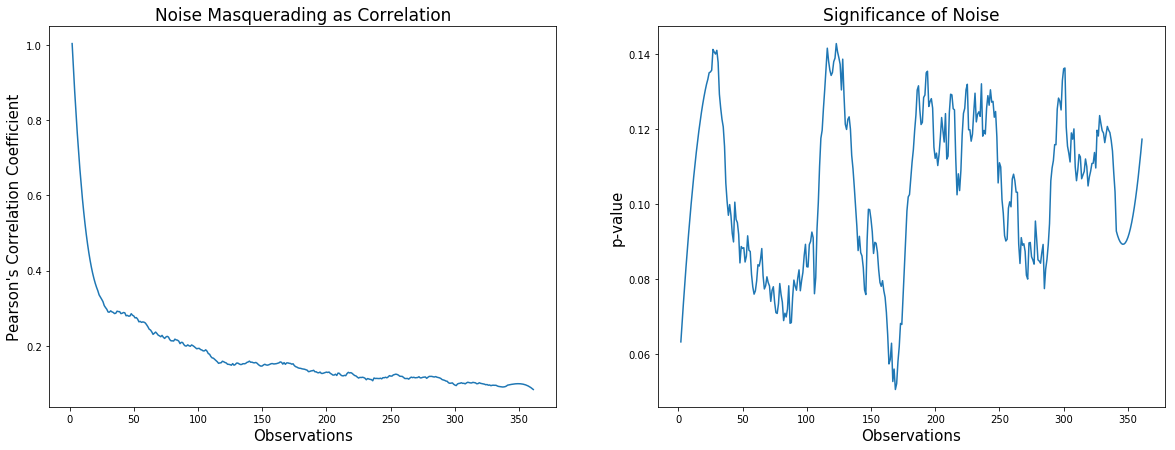

In [5]:
plt.figure(figsize=(10, 7))

# Smooth the correlation curve
smooth_corr = savgol_filter(corrs, 41, 3)
smooth_p = savgol_filter(pvalues, 41, 2)

fig, [ax1, ax2] = plt.subplots(1, 2, 
                               sharey = False, 
                               constrained_layout = False,
                               figsize = (20, 7))

# First plot
ax1.plot(n_vector, smooth_corr)
ax1.set_title('Noise Masquerading as Correlation', fontsize=17)
ax1.set_xlabel('Observations', fontsize=15)
ax1.set_ylabel("Pearson's Correlation Coefficient", fontsize=15)

# Second plot
ax2.plot(n_vector, smooth_p)
ax2.set_title('Significance of Noise', fontsize=17)
ax2.set_xlabel('Observations', fontsize=15)
ax2.set_ylabel('p-value', fontsize=15);

Any correlation observed for these two orthogonal random variable vector is just noise, because by design of this experiment, these two random variables are independent of each other.

## 3. Discussion

It's possible to be tricked by your data into thinking that a causual relationship exists between random variables.

We can observe that as the number of observations in our two random variables increase, the probability of observing a seemingly significant Pearson's correlation coefficient decays quickly.  However, for random variables with less than 50 observations, the observed correlations can easily mislead you.  

---

If you're dealing with big data this should be less of an issue, but it's always a good idea to proceed with caution.  Especially if your contributions as a decision scientist are among the primary motivations for key business decisions.


## 4. Conclusion

Be aware that the noise floor can give the illusion of correlated random variables when working with small sample sizes.

These results help ossify one of the maxims of statistics: the more data, the better.